## <center> McDonald:Case Study</center>

<img src="https://www.qsrmagazine.com/sites/default/files/styles/story_page/public/story/mcdonalds-getting-even-more-serious-about-tech.jpg?itok=QNbr6UbC" width="500" height="500">


##### Description
McDonalds is an American fast food company with operations in more than 100 countries and revenues in excess of $ 20 billion. McDonald’s offers a menu that includes fries, the Big Mac, chicken sandwiches, chicken nuggets, hamburgers, salads, wraps, desserts, soft drinks, and other beverages. However, to ensure that it connects with the international markets, McDonald’s offers locally relevant food menus as well.

In [1]:
#Reading the data set
Mcdata = read.csv("../input/nutrition-facts/menu.csv",header =TRUE)
cat("Dimension of data" ,nrow(Mcdata),"x",ncol(Mcdata),"\n\n")

#Variable Identified
cat("Variables:",colnames(Mcdata))


Dimension of data 260 x 24 

Variables: Category Item Serving.Size Calories Calories.from.Fat Total.Fat Total.Fat....Daily.Value. Saturated.Fat Saturated.Fat....Daily.Value. Trans.Fat Cholesterol Cholesterol....Daily.Value. Sodium Sodium....Daily.Value. Carbohydrates Carbohydrates....Daily.Value. Dietary.Fiber Dietary.Fiber....Daily.Value. Sugars Protein Vitamin.A....Daily.Value. Vitamin.C....Daily.Value. Calcium....Daily.Value. Iron....Daily.Value.

In [2]:
#Changing colnames
new_names = gsub(pattern = "*....Daily.Value.", replacement=".Reg", names(Mcdata))#Substitute Daily.Valuue to Reg
names(Mcdata) = new_names
cat("Variable:",names(Mcdata))

Variable: Category Item Serving.Size Calories Calories.from.Fat Total.Fat Total.Fat.Reg Saturated.Fat Saturated.Fat.Reg Trans.Fat Cholesterol Cholesterol.Reg Sodium Sodium.Reg Carbohydrates Carbohydrates.Reg Dietary.Fiber Dietary.Fiber.Reg Sugars Protein Vitamin.A.Reg Vitamin.C.Reg Calcium.Reg Iron.Reg

The category having maximum number of variety Coffee & Tea : 95 varities
The category having minimum number of variety Salads : 6 varities

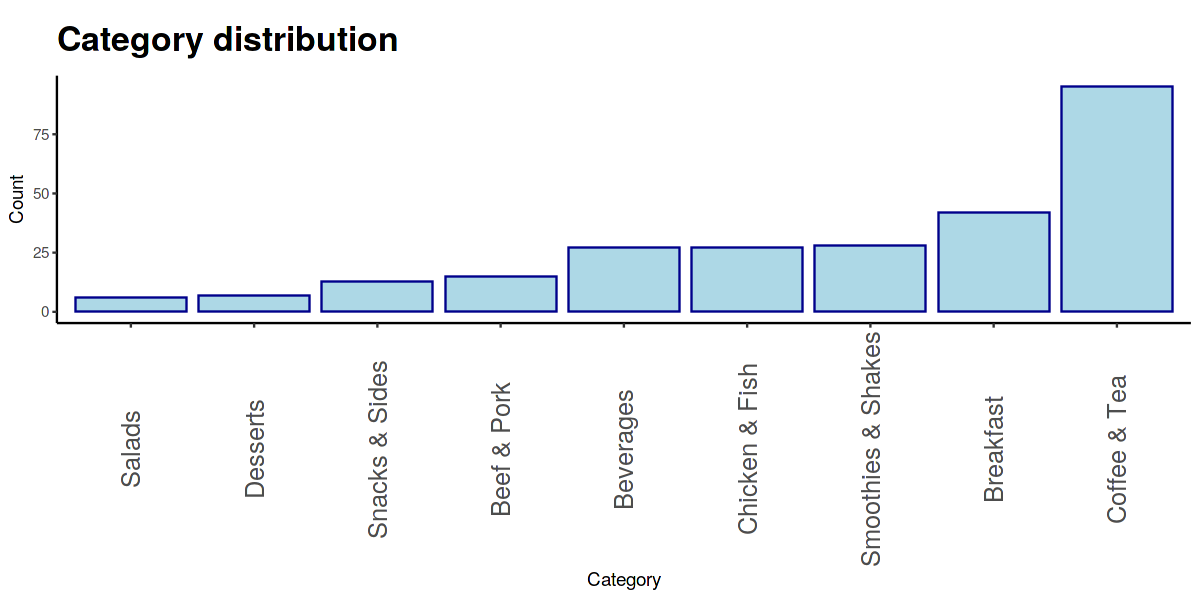

In [3]:
#Which food categories have the highest and lowest varieties ?

library(ggplot2)
options(repr.plot.height=5, repr.plot.width=10)
Mcdata$Category = as.factor(Mcdata$Category)
Mc_Category=table(Mcdata$Category)
ggplot(Mcdata) +
  geom_bar(aes(x = reorder(Category, Mc_Category[Category])),color='darkblue', fill = "lightblue") +
 theme_classic()+
  labs(y ="Count",x ="Category",size=10)+ggtitle("Category distribution")+theme(plot.title = element_text(size=20, face="bold", 
    margin = margin(10, 0, 10, 0)))+theme(axis.text.x=element_text(angle=90, size=15, vjust=0.5))
cat("The category having maximum number of variety",names(Mc_Category[which.max(Mc_Category)]),":",max(Mc_Category),"varities\n")

cat("The category having minimum number of variety",names(Mc_Category[which.min(Mc_Category)]),":",min(Mc_Category),"varities")

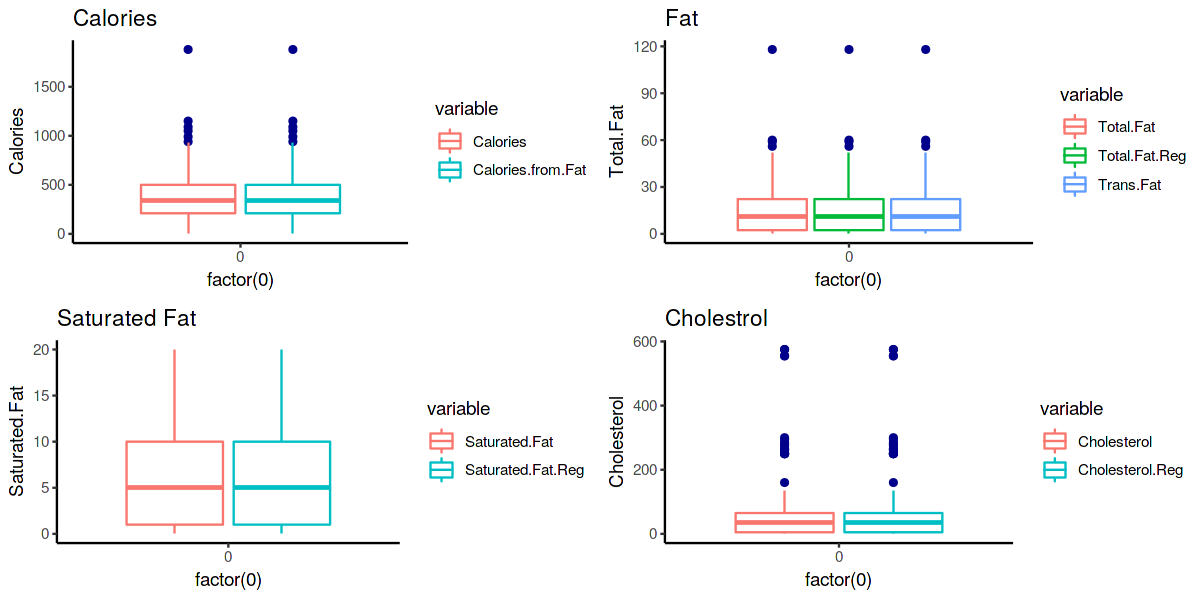

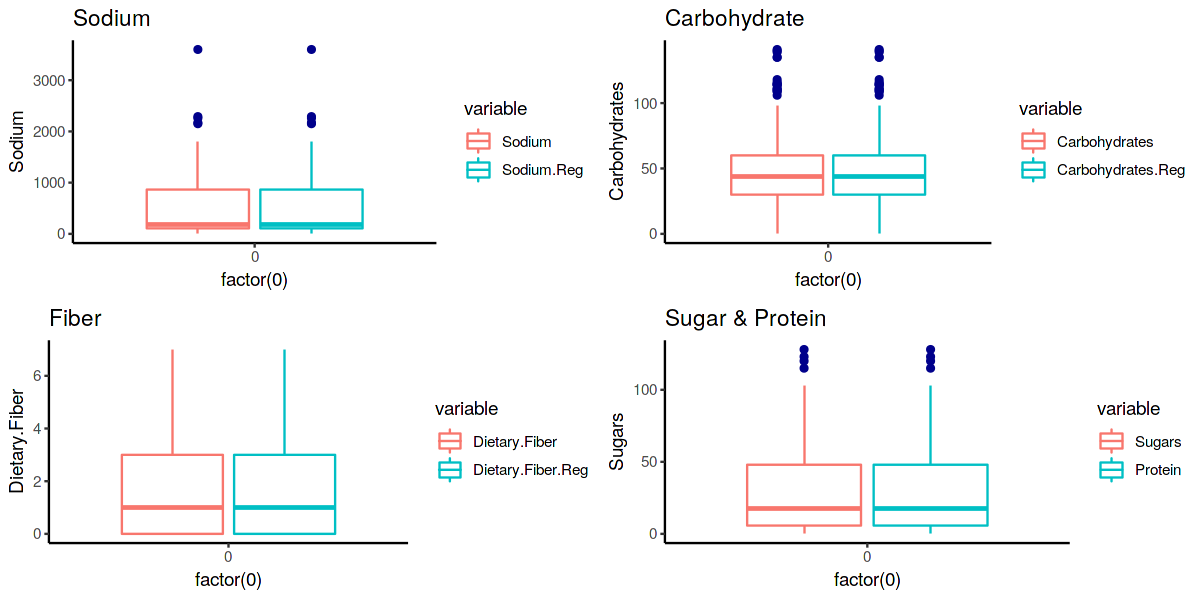

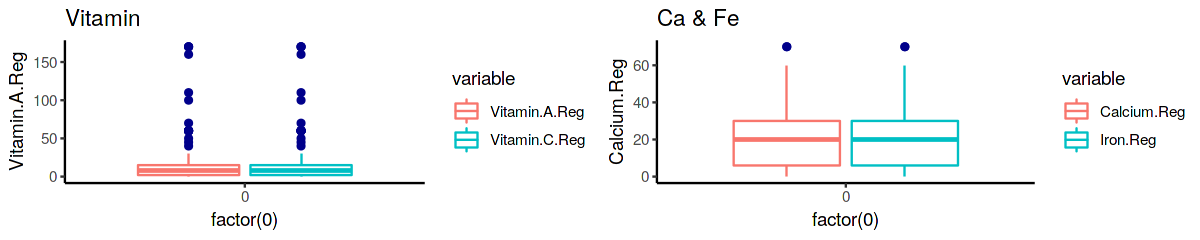

In [4]:
#Which all variables have an outlier ?
library(reshape2)
dat.1 <- melt(Mcdata,id.vars='Calories', measure.vars=c("Calories","Calories.from.Fat"))
dat.2 <- melt(Mcdata,id.vars='Total.Fat', measure.vars=c("Total.Fat","Total.Fat.Reg","Trans.Fat"))
dat.2_1 <- melt(Mcdata,id.vars='Saturated.Fat', measure.vars=c("Saturated.Fat","Saturated.Fat.Reg"))
dat.3 <- melt(Mcdata,id.vars="Cholesterol", measure.vars=c("Cholesterol","Cholesterol.Reg"))
dat.4 <- melt(Mcdata,id.vars='Sodium', measure.vars=c("Sodium","Sodium.Reg"))
dat.5 <- melt(Mcdata,id.vars='Carbohydrates', measure.vars=c("Carbohydrates","Carbohydrates.Reg"))
dat.6 <- melt(Mcdata,id.vars='Dietary.Fiber', measure.vars=c("Dietary.Fiber","Dietary.Fiber.Reg"))
dat.7 <- melt(Mcdata,id.vars='Sugars', measure.vars=c("Sugars","Protein"))
dat.8 <- melt(Mcdata,id.vars='Vitamin.A.Reg', measure.vars=c("Vitamin.A.Reg","Vitamin.C.Reg"))
dat.9 <- melt(Mcdata,id.vars='Calcium.Reg', measure.vars=c("Calcium.Reg","Iron.Reg"))
library(ggplot2)
library(gridExtra)
options(repr.plot.height=5, repr.plot.width=10)
p1 <- ggplot(dat.1) +geom_boxplot(outlier.colour = "dark blue",aes(y=Calories,x=factor(0),color=variable))+theme_classic()+labs(title="Calories")
p2 <- ggplot(dat.2) +geom_boxplot(outlier.colour = "dark blue",aes(y=Total.Fat, x=factor(0),color=variable))+theme_classic()+labs(title="Fat")
p2_1<- ggplot(dat.2_1) +geom_boxplot(outlier.colour = "dark blue",aes(y=Saturated.Fat, x=factor(0),color=variable))+theme_classic()+labs(title="Saturated Fat")
p3 <- ggplot(dat.3) +geom_boxplot(outlier.colour = "dark blue",aes(y=Cholesterol,x=factor(0),color=variable))+theme_classic()+labs(title="Cholestrol")
p4 <- ggplot(dat.4) +geom_boxplot(outlier.colour = "dark blue",aes(y=Sodium,x=factor(0),color=variable))+theme_classic()+labs(title="Sodium")
p5 <- ggplot(dat.5) +geom_boxplot(outlier.colour = "dark blue",aes(y=Carbohydrates,x=factor(0),color=variable))+theme_classic()+labs(title="Carbohydrate")
p6 <- ggplot(dat.6) +geom_boxplot(outlier.colour = "dark blue",aes(y=Dietary.Fiber,x=factor(0),color=variable))+theme_classic()+labs(title="Fiber")
p7 <- ggplot(dat.7) +geom_boxplot(outlier.colour = "dark blue",aes(y=Sugars,x=factor(0),color=variable))+theme_classic()+labs(title="Sugar & Protein")
p8 <- ggplot(dat.8) +geom_boxplot(outlier.colour = "dark blue",aes(y=Vitamin.A.Reg,x=factor(0),color=variable))+theme_classic()+labs(title="Vitamin")
p9 <- ggplot(dat.9) +geom_boxplot(outlier.colour = "dark blue",aes(y=Calcium.Reg,x=factor(0),color=variable))+theme_classic()+labs(title="Ca & Fe")
grid.arrange(p1,p2,p2_1,p3,ncol=2,nrow=2)
grid.arrange(p4,p5,p6,p7,ncol=2,nrow=2)
options(repr.plot.height=2, repr.plot.width=10)
grid.arrange(p8,p9,ncol=2,nrow=1)

In [5]:
q1 = boxplot.stats(Mcdata$Dietary.Fiber)$out
q2 =boxplot.stats(Mcdata$Dietary.Fiber.Reg)$out
q3 =boxplot.stats(Mcdata$Saturated.Fat)$out
q4 =boxplot.stats(Mcdata$Saturated.Fat.Reg)$out
str(q1)
str(q2)
str(q3)
str(q4)
#Showing only Dietry.Fiber have outlier value i.e.28

 int(0) 
 int [1:4] 28 28 28 28
 num(0) 
 int(0) 


So except Dieatry.Fiber, Saturated.Fat, Saturated.Fat.Reg variable rest all the variable have outlier as Dietary.Fiber.Reg only have one value 28 as an outlier it wasn't picked out in the graph

corrplot 0.84 loaded



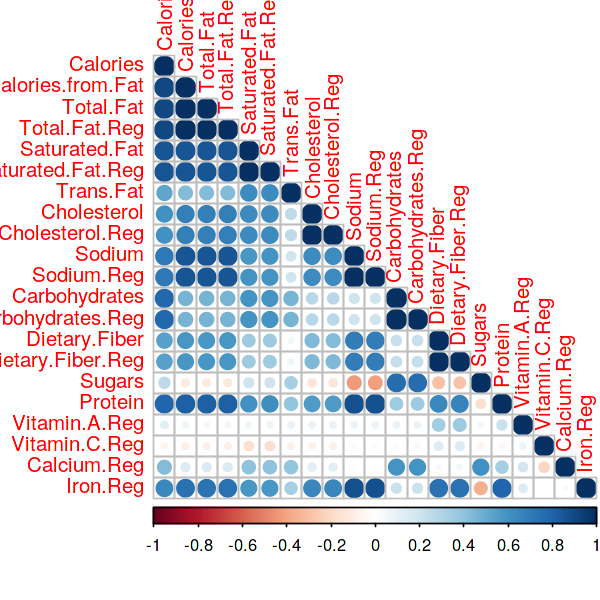

In [6]:
#Which variables have the Highest correlation. Plot them and tell the value.

library("corrplot")
#Correlation matrix plot
options(repr.plot.width = 5, repr.plot.height = 5)
cor_matrix = round(cor(Mcdata[,4:24],use = "complete.obs",method="pearson"),2)
corrplot(cor_matrix, type="lower")

Calories was highly correlated positively to Calories from Fat, Total Fat, Saturated Fat, Sodium, Carbohydrates, Protien

Plot also highlights Sodium ,Protien & Iron too are highly correlated positively.Even Carbohydrates and Sugars show good bonding positively.There is some week bonding of -4 between Sodium , Sugar and Iron

In [7]:
library("Hmisc")
library("dplyr")
res2 <- rcorr(as.matrix(Mcdata[,4:24]))

#Converting the matrix into a table 
flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}
flatmat = flattenCorrMatrix(res2$r,res2$P)
Reordered_correlation = flatmat %>%arrange(desc(cor))
#Top 10 values with high correlation value
head(Reordered_correlation,10)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘dplyr’


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,row,column,cor,p
,<fct>,<fct>,<dbl>,<dbl>
1,Sodium,Sodium.Reg,0.9999286,0
2,Cholesterol,Cholesterol.Reg,0.9998554,0
3,Total.Fat,Total.Fat.Reg,0.9997647,0
4,Calories.from.Fat,Total.Fat.Reg,0.9997253,0
5,Calories.from.Fat,Total.Fat,0.9996635,0
6,Carbohydrates,Carbohydrates.Reg,0.9996204,0
7,Saturated.Fat,Saturated.Fat.Reg,0.9992786,0
8,Dietary.Fiber,Dietary.Fiber.Reg,0.9863503,0
9,Calories,Calories.from.Fat,0.9045878,0


In Pearson Correlation,the correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables. So as we could see in the Top 10 correlation table Sodium and Sodium Daily values are highly correlated

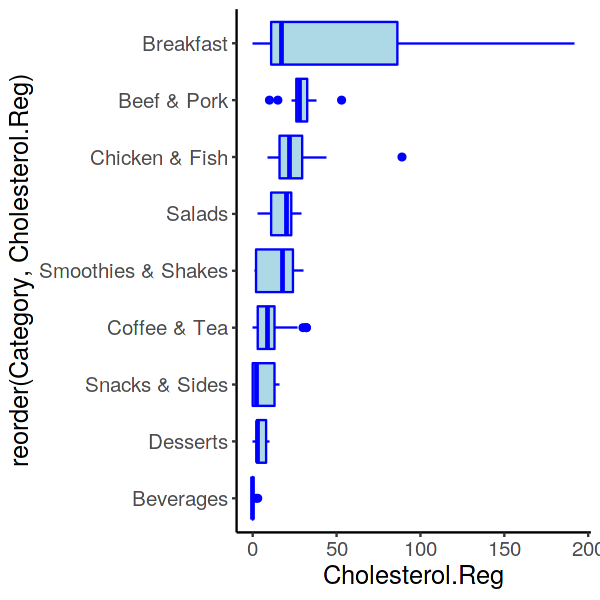

In [8]:
#Which category contributes to the maximum % of Cholesterol in a diet (% daily value)?
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(Mcdata,aes(x = reorder(Category,Cholesterol.Reg), y = Cholesterol.Reg)) +
  geom_boxplot(fill='lightblue', color="blue") +theme_classic()+
  coord_flip() + theme(text = element_text(size=15))

In [9]:
max_Chol= Mcdata %>% group_by(Category) %>% summarise(Chol.Level = max(Cholesterol.Reg)) %>% arrange(desc(Chol.Level))
max_Chol

`summarise()` ungrouping output (override with `.groups` argument)



Category,Chol.Level
<fct>,<int>
Breakfast,192
Chicken & Fish,89
Beef & Pork,53
Coffee & Tea,32
Smoothies & Shakes,30
Salads,29
Snacks & Sides,16
Desserts,10
Beverages,3


Breakfast as category contributes the highest Cholestrol (% Daily Value ) in McD Food items

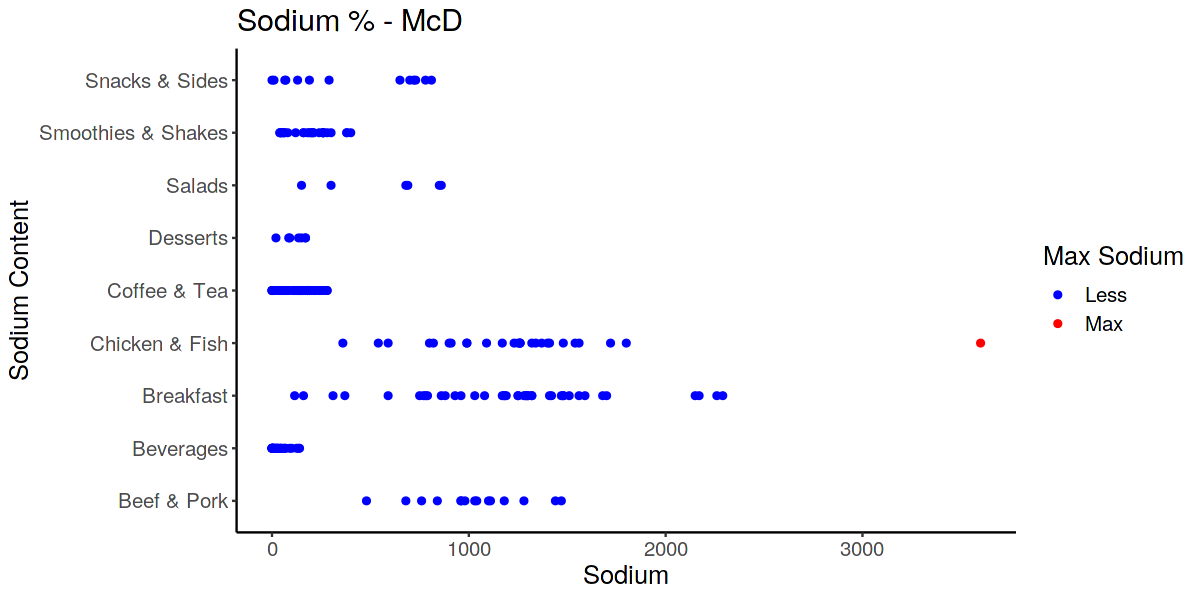

In [10]:
#Which item contributes maximum to the Sodium intake?
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(Mcdata, aes(x = Sodium, y=Category)) +
geom_point(aes(color = ifelse(Sodium >= max(Sodium),"Max","Less")))+
scale_color_manual(values = c('blue', 'red'))+
labs(color = "Max Sodium", y = "Sodium Content", title = "Sodium % - McD") +
theme_classic()+
theme(text = element_text(size=15))

In [11]:
Reordered_Sodium = Mcdata %>%arrange(desc(Sodium))
Item_with_maxsod =data.frame(Reordered_Sodium$Item,Reordered_Sodium$Sodium)
head(Item_with_maxsod,6)


,Reordered_Sodium.Item,Reordered_Sodium.Sodium
,<fct>,<int>
1,Chicken McNuggets (40 piece),3600
2,Big Breakfast with Hotcakes and Egg Whites (Large Biscuit),2290
3,Big Breakfast with Hotcakes (Large Biscuit),2260
4,Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit),2170
5,Big Breakfast with Hotcakes (Regular Biscuit),2150
6,Chicken McNuggets (20 piece),1800


In [12]:
#Which 4 food items contains the most amount of Saturated Fat?
max_fat = mac_fat = Mcdata %>% arrange(desc(Saturated.Fat)) %>% select(Item, Saturated.Fat) %>% top_n(4, Saturated.Fat)
max_fat

Item,Saturated.Fat
<fct>,<dbl>
Big Breakfast with Hotcakes (Large Biscuit),20
Chicken McNuggets (40 piece),20
Frappé Chocolate Chip (Large),20
McFlurry with M&M’s Candies (Medium),20
